# What are Scheduled Tasks?
  
A scheduled task is a process that can be set up to run at specified intervals or times. There are a few different types of scheduled tasks within the ArcGIS world- we're going to be examining one of the most common ones, which is scheduling a notebook to run at a certain time (this can be likened to automatically running a notebook or Python script using something like Windows Task Scheduler). However, there are numerous other cases where a scheduled task can come in handy, like the ones below.

# Use cases:

> **Data Management**: Scheduled tasks enable you to automate data management processes within your organization. You can schedule tasks to regularly update, synchronize, or clean up data, ensuring that your datasets are accurate, up to date, and consistent.

> **Workload Automation**: Scheduled tasks help streamline administrative workflows by automating routine tasks. This saves time and effort by eliminating the need for manual intervention in repetitive processes. For example, you can schedule tasks to automatically generate and deliver reports, update data sources, or perform data validation checks.

> **Timely Updates**: Some workflows require regular updates or synchronization with external systems or data sources. Scheduled tasks ensure that these updates occur at specified intervals, guaranteeing that your organization's data is always current and aligned with the latest information.

> **Resource Optimization**: By scheduling tasks during off-peak hours or non-business hours, you can optimize resource utilization within your ArcGIS Online organization. For example, you can schedule resource-intensive geoprocessing tasks to run overnight when server loads are lower, minimizing impact on performance during peak usage periods.

> **Proactive Maintenance**: Scheduled tasks can be used for proactive maintenance and monitoring of your ArcGIS Online environment. You can schedule tasks to periodically check for system health, monitor usage patterns, or perform backup operations to ensure the stability and reliability of your organization's resources.

# Demo: Create a Task

Let's go ahead and create a task for our notebook! First, we'll take a quick look at it to see exactly what we're doing. As we mentioned in the previous notebook, we're essentially grabbing the daily Gulf Stream shape data, appending it to a Spatially Enabled DataFrame containing the data from the past days, and then using that DataFrame to update the features in our layer. Since we have a webhook set up monitoring if the features are updated, we have a system in place to alert us if the notebook is/isn't running properly once we schedule it. Let's get to it!

#### Establish a Connection

In [1]:
from arcgis.gis import GIS

gis = GIS(profile="your_online_profile")

/opt/anaconda3/envs/uc2024/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Get Task Management Class

This class will show all of the tasks that a given user has created- in this instance, this user happens to be me. Crazy.

In [17]:
# The task manager can be called from a property on the user object
task_manager = gis.users.me.tasks
task_manager

<User nparavicini_geosaurus Tasks>

### See current tasks

In [3]:
# get all tasks
tasks = task_manager.all

# print out task names
for task in tasks:
    print(task.properties["title"])

Workflow_Cleanup_2179bee069b3420686e4ce20e5e9fc2b
updation
My_UC2024_Task2
My_UC2024_Task
Workflow_Cleanup_896148a522c04cd6b03ca27f31303b0e


As you all can see, there are already some tasks running- I'm clearly doing really important stuff all the time that I just can't constantly monitor myself. The Workflow Manager tasks are a good example of other things that may be commonly automated in ArcGIS Online.

### Create a Task for the Notebook

Now, we'll schedule a task for the notebook. Note we use the `ExecuteNotebook` task name. A full list of tasks can be found [here](https://developers.arcgis.com/python/api-reference/arcgis.gis.tasks.html).

<Item title:"Gulf Stream Updating Notebook" type:Notebook owner:nparavicini_geosaurus>
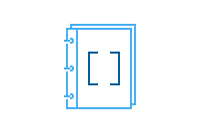

In [4]:
# Get a notebook
notebook_item = gis.content.get("dc96e6f66d7543409414ad1f0160d81f")
notebook_item

In [5]:
# Create a task for the notebook
task = task_manager.create(
    title="Task_test",
    task_type="ExecuteNotebook",
    item=notebook_item,
    cron="2 2 2 2 ?",
)

In [6]:
task

<Task @ eb9303c1552d46dda6e6dcf58a2b0e7f>

In [7]:
task.properties

{'id': 'eb9303c1552d46dda6e6dcf58a2b0e7f', 'itemId': 'dc96e6f66d7543409414ad1f0160d81f', 'type': 'ExecuteNotebook', 'title': 'Task_test', 'userId': 'nparavicini_geosaurus', 'cronSchedule': {'minute': '2', 'hour': '2', 'dayOfMonth': '2', 'month': '2', 'dayOfWeek': '?'}, 'runIntervalSeconds': 0, 'nextStart': 1738461740000, 'maxOccurrences': 10, 'created': 1721340287000, 'updated': 1721340287000, 'active': True, 'taskState': 'active'}

## Update the Task

Now we'll update the task to do specifically what we want it to- execute once a day at a certain time. `cron` is what's used for the day/time side of this business- the first number referes to the minute, second hour, third day of the month, fourth month, fifth day of the week. The * for month equates to every month, ? means the day of the week doesn't matter, and */1 means every day of the month but only once per day.

In [8]:
task.update(title="My_UC2024_Task3", cron="07 22 */1 * ?")

True

In [9]:
print(task.properties["title"])
print(task.properties["cronSchedule"])

My_UC2024_Task3
{'minute': '07', 'hour': '22', 'dayOfMonth': '*/1', 'month': '*', 'dayOfWeek': '?'}


In [10]:
task_manager.all

[<Task @ 154188062c57430f8b1dc261f6c69103>,
 <Task @ 7616e1a83f504c8384db56fb8c2cca83>,
 <Task @ 898c0ce13a3d473c850f233921c17529>,
 <Task @ ef37a3da51c7462991e81e0c1745281d>,
 <Task @ f02cd8001ec14a4d9f805c88082e4e77>]

In [18]:
task_manager.all[3].properties

{'id': 'eb9303c1552d46dda6e6dcf58a2b0e7f', 'itemId': 'dc96e6f66d7543409414ad1f0160d81f', 'type': 'ExecuteNotebook', 'title': 'My_UC2024_Task3', 'userId': 'nparavicini_geosaurus', 'cronSchedule': {'minute': '07', 'hour': '22', 'dayOfMonth': '*/1', 'month': '*', 'dayOfWeek': '?'}, 'runIntervalSeconds': 0, 'nextStart': 1721340420000, 'maxOccurrences': 10, 'created': 1721340287000, 'updated': 1721340347000, 'active': True, 'taskState': 'active'}

Now that we have this in place, it should run here shortly without us doing anything- we can refer to either our webhook or the ArcGIS Online page for confirmation that it worked as expected.

### Clean up

In [ ]:
task.delete()

Poof!

# Look at the Doc!
https://developers.arcgis.com/python/api-reference/arcgis.gis.tasks.html#taskmanager